# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

## Student comments: I got stuck somewhere towards the end. Any suggestions to help me complete this project would be appreciated. Thank you!


In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats



## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [4]:
# Print a sample of data for plans

plans_head = plans.head()
print(plans_head)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
plans.columns=plans.columns.str.lower()
plans.columns=plans.columns.str.replace(' ','_')
plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
print(users)


     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
..                                     

In [7]:
# Print a sample of data for users
users_head = users.head()
print(users_head)


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [8]:
users.columns=users.columns.str.lower()
users.columns=users.columns.str.replace(' ','_')
users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [9]:
users["churn_date"] = (users['churn_date'].isna().fillna(0).astype(int))


In [10]:
users.head()

user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate           1  
1  2018-08-13      surf           1  
2  2018-10-21      surf           1  
3  2018-01-28      surf           1  
4  2018-05-23      surf           1

In [11]:
users.shape

(500, 8)

In [12]:
cleaned_calls = calls.groupby(['call_date', 'user_id'])['duration'].sum()
cleaned_calls.head()

call_date   user_id
2018-01-15  1077       19.84
            1196       10.91
2018-01-16  1042       21.20
            1077       35.64
            1196       12.01
Name: duration, dtype: float64

In [13]:
cleaned_calls.shape

(51959,)

In [14]:
cleaned_calls.duplicated().sum()

call_date   user_id
2018-01-15  1077       False
            1196       False
2018-01-16  1042       False
            1077       False
            1196       False
                       ...  
2018-12-31  1495        True
            1496        True
            1497        True
            1498        True
            1499        True
Name: duration, Length: 51959, dtype: bool

## Calls

In [15]:
# Print the general/summary information about the calls' DataFrame
calls.head()


id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

In [16]:
# Print a sample of data for calls
calls_head = calls.head()
print(calls_head)


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [17]:
calls.columns=calls.columns.str.lower()
calls.columns=calls.columns.str.replace(' ','_')
calls["duration"]=np.ceil(calls["duration"])

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Messages

In [18]:
# Print the general/summary information about the messages' DataFrame

print(messages)

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]


In [19]:
# Print a sample of data for messages
messages_head = messages.head()
print(messages_head)

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


In [20]:
messages.head()

id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

In [21]:
messages.shape

(76051, 3)

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [22]:
messages.columns=messages.columns.str.lower()
messages.columns=messages.columns.str.replace(' ','_')
messages.columns

Index(['id', 'user_id', 'message_date'], dtype='object')

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [23]:
# Print the general/summary information about the internet DataFrame
print(internet)


              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]


In [24]:
# Print a sample of data for the internet traffic
internet_head = internet.head()
print(internet_head)


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [25]:
internet.columns=internet.columns.str.lower()
internet.columns=internet.columns.str.replace(' ','_')
internet.columns

Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

In [26]:
internet.shape

(104825, 4)

In [27]:
cleaned_internet = internet.groupby(['user_id'])['mb_used'].sum()
cleaned_internet.head()

user_id
1000      1901.47
1001     80437.94
1002     40293.33
1003     27044.14
1004    156352.81
Name: mb_used, dtype: float64

In [28]:
cleaned_internet.shape

(489,)

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [29]:
# Print out the plan conditions and make sure they are clear for you
print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [30]:
# Calculate the number of calls made by each user per month. Save the result.
calls_number = calls['call_date'] = pd.to_datetime(calls['call_date'])
print(calls_number)

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]


In [31]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls['month'] = calls['call_date'].dt.month
calls_group = calls.groupby(['month', 'user_id']).sum().reset_index()
print(calls_group)


      month  user_id  duration
0         1     1042     114.0
1         1     1077     290.0
2         1     1185     181.0
3         1     1196     287.0
4         1     1214      16.0
...     ...      ...       ...
2253     12     1495     492.0
2254     12     1496     294.0
2255     12     1497     300.0
2256     12     1498     339.0
2257     12     1499     496.0

[2258 rows x 3 columns]


In [32]:
# Ensure message_date is in the correct datetime format
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Create a new column for the month extracted from message_date
messages['month'] = messages['message_date'].dt.month

# Properly group by 'user_id' and 'month', then sum and reset index
# It looks like you want to sum some numerical column. If you're trying to count messages, you might use `.count()` instead
messages_group = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_group.columns = ['user_id', 'month', 'messages']

# Now let's print the grouped DataFrame
print(messages_group)

      user_id  month  messages
0        1000     12        11
1        1001      8        30
2        1001      9        44
3        1001     10        53
4        1001     11        36
...       ...    ...       ...
1801     1496      9        21
1802     1496     10        18
1803     1496     11        13
1804     1496     12        11
1805     1497     12        50

[1806 rows x 3 columns]


In [33]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Create a month-year column for grouping
internet['month'] = internet['session_date'].dt.month

# Group by new month_year and user_id, then sum mb_used and reset index
internet_traffic = internet.groupby(['month', 'user_id'])['mb_used'].sum().reset_index()
internet_traffic["gb_used"]=np.ceil(internet_traffic["mb_used"]/1024)

print(internet_traffic)

      month  user_id   mb_used  gb_used
0         1     1042   1854.93      2.0
1         1     1077  10635.64     11.0
2         1     1185   6812.77      7.0
3         1     1196   8908.61      9.0
4         1     1214   1315.35      2.0
...     ...      ...       ...      ...
2272     12     1495  24097.40     24.0
2273     12     1496  16438.99     17.0
2274     12     1497  11106.55     11.0
2275     12     1498  23137.69     23.0
2276     12     1499  22059.21     22.0

[2277 rows x 4 columns]


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [34]:
# First, merge the first two DataFrames
merged_data = pd.merge(calls_group, messages_group, on=['user_id', 'month'], how='left')



In [35]:
merged_data.head()

month  user_id  duration  messages
0      1     1042     114.0       NaN
1      1     1077     290.0      37.0
2      1     1185     181.0       NaN
3      1     1196     287.0      23.0
4      1     1214      16.0       2.0

In [36]:
merged_data.shape

(2258, 4)

In [37]:
second_merged_data = pd.merge(merged_data, internet_traffic, on=['user_id', 'month'], how='left')

In [38]:
second_merged_data.head()

month  user_id  duration  messages   mb_used  gb_used
0      1     1042     114.0       NaN   1854.93      2.0
1      1     1077     290.0      37.0  10635.64     11.0
2      1     1185     181.0       NaN   6812.77      7.0
3      1     1196     287.0      23.0   8908.61      9.0
4      1     1214      16.0       2.0   1315.35      2.0

In [39]:
third_merged_data = pd.merge(second_merged_data, messages_group, on=['user_id', 'month'], how='left')

In [40]:
third_merged_data.head()

month  user_id  duration  messages_x   mb_used  gb_used  messages_y
0      1     1042     114.0         NaN   1854.93      2.0         NaN
1      1     1077     290.0        37.0  10635.64     11.0        37.0
2      1     1185     181.0         NaN   6812.77      7.0         NaN
3      1     1196     287.0        23.0   8908.61      9.0        23.0
4      1     1214      16.0         2.0   1315.35      2.0         2.0

In [41]:
# Next, merge the result with the users DataFrame
final_merged_data = pd.merge(second_merged_data, users, on='user_id', how='left')

In [42]:
final_merged_data.head()

month  user_id  duration  messages   mb_used  gb_used  first_name  \
0      1     1042     114.0       NaN   1854.93      2.0  Clementina   
1      1     1077     290.0      37.0  10635.64     11.0        Chau   
2      1     1185     181.0       NaN   6812.77      7.0       Loria   
3      1     1196     287.0      23.0   8908.61      9.0        Noel   
4      1     1214      16.0       2.0   1315.35      2.0        Emil   

    last_name  age                                             city  \
0  Mclaughlin   40  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA   
1     Webster   23            Charlotte-Concord-Gastonia, NC-SC MSA   
2     Freeman   47           Louisville/Jefferson County, KY-IN MSA   
3      Dawson   46           Los Angeles-Long Beach-Anaheim, CA MSA   
4      Robles   34           San Francisco-Oakland-Berkeley, CA MSA   

     reg_date      plan  churn_date  
0  2018-01-15      surf           1  
1  2018-01-14  ultimate           1  
2  2018-01-14  ultimate           1  
3  2018-01-14  ultimate           1  
4  2018-01-01  ultimate           1

In [43]:
def additional_charges(row):
    # Initialize charges
    call_charge, message_charge, internet_charge = 0, 0, 0


    # Correct calculations assuming ‘duration’, ‘messages’, and ‘mb_used’ are column names in `row`
    call_charge += max(0, (row['duration'] - plans_data[row['plan']]['minutes_included']) * plans_data[row['plan']]['usd_per_minute'])
    message_charge += max(0, (row['messages'] - plans_data[row['plan']]['messages_included']) * plans_data[row['plan']]['usd_per_message'])
    internet_charge += max(0, (row['mb_used'] - plans_data[row['plan']]['mb_per_month_included']) * plans_data[row['plan']]['usd_per_gb']/1024)

    total_monthly_charge = call_charge + message_charge + internet_charge + plans_data[row['plan']]['us_monthly_pay']
    return total_monthly_charge

# Correctly initialized dictionary
plans_data = {
    "surf": {'minutes_included': 500, 'messages_included': 50, 'mb_per_month_included': 15360, 'usd_per_minute': 0.03, 'usd_per_message': 0.03, 'usd_per_gb': 10, 'us_monthly_pay': 20},
    "ultimate": {'minutes_included': 3000, 'messages_included': 1000, 'mb_per_month_included': 30720, 'usd_per_minute': 0.01, 'usd_per_gb': 7, 'usd_per_message': 0.01, 'us_monthly_pay': 70}
}

# Apply function with correct syntax
final_merged_data["total_monthly_charge"] = final_merged_data.apply(additional_charges, axis=1)


In [44]:
final_merged_data.head()

month  user_id  duration  messages   mb_used  gb_used  first_name  \
0      1     1042     114.0       NaN   1854.93      2.0  Clementina   
1      1     1077     290.0      37.0  10635.64     11.0        Chau   
2      1     1185     181.0       NaN   6812.77      7.0       Loria   
3      1     1196     287.0      23.0   8908.61      9.0        Noel   
4      1     1214      16.0       2.0   1315.35      2.0        Emil   

    last_name  age                                             city  \
0  Mclaughlin   40  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA   
1     Webster   23            Charlotte-Concord-Gastonia, NC-SC MSA   
2     Freeman   47           Louisville/Jefferson County, KY-IN MSA   
3      Dawson   46           Los Angeles-Long Beach-Anaheim, CA MSA   
4      Robles   34           San Francisco-Oakland-Berkeley, CA MSA   

     reg_date      plan  churn_date  total_monthly_charge  
0  2018-01-15      surf           1                  20.0  
1  2018-01-14  ultimate           1                  70.0  
2  2018-01-14  ultimate           1                  70.0  
3  2018-01-14  ultimate           1                  70.0  
4  2018-01-01  ultimate           1                  70.0

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

No handles with labels found to put in legend.


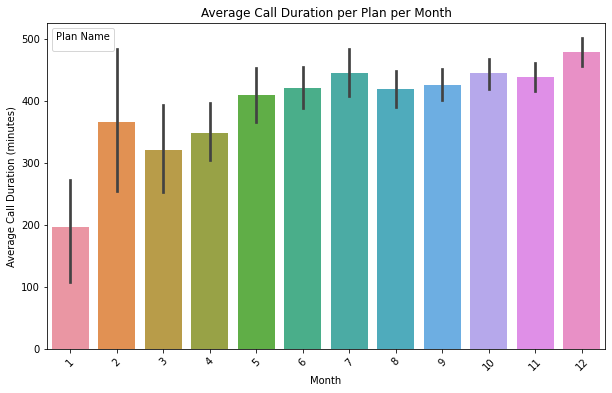

In [45]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it

plt.figure(figsize=(10, 6))
sns.barplot(data= final_merged_data, x='month', y='duration')  # Adjust 'plan_name' as appropriate
plt.title('Average Call Duration per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Plan Name')
plt.show()

No handles with labels found to put in legend.


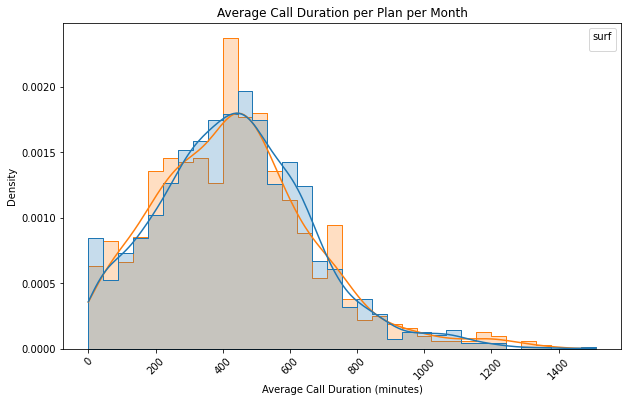

In [46]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Setting up the figure size
plt.figure(figsize=(10, 6))


# Plotting a histogram for call durations. Seaborn automatically calculates frequency distribution.
sns.histplot(data=final_merged_data, hue='plan', x='duration', element='step', stat='density', common_norm=False, kde=True)

# Setting up the plot's titles and labels
plt.title('Average Call Duration per Plan per Month')
plt.xlabel('Average Call Duration (minutes)')
plt.ylabel('Density')

# Rotating the x-tick labels if necessary
plt.xticks(rotation=45)

# Adding a legend to explain which histogram corresponds to which plan
plt.legend(title='surf')

# Displaying the plot
plt.show()


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [47]:
# Calculate the mean and the variance of the monthly call duration
mean_call_duration = final_merged_data.groupby('user_id')['duration'].mean()
print("Mean Call Duration by Plan:")
print(mean_call_duration)

# Calculate the variance of call duration per plan
variance_call_duration = final_merged_data.groupby('user_id')['duration'].var()
print("\nVariance of Call Duration by Plan:")
print(variance_call_duration)


Mean Call Duration by Plan:
user_id
1000     124.000000
1001     345.600000
1002     276.333333
1003    1104.000000
1004     346.500000
           ...     
1495     441.250000
1496     291.000000
1497     300.000000
1498     291.909091
1499     383.750000
Name: duration, Length: 481, dtype: float64

Variance of Call Duration by Plan:
user_id
1000             NaN
1001    10205.300000
1002    35426.333333
1003             NaN
1004     7940.571429
            ...     
1495    18960.916667
1496    11166.000000
1497             NaN
1498     2480.490909
1499     6588.250000
Name: duration, Length: 481, dtype: float64


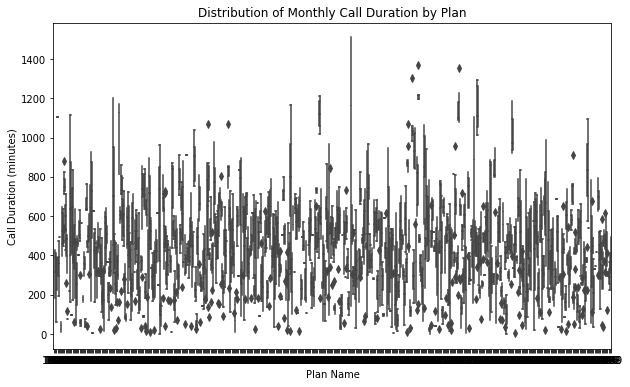

In [48]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_merged_data, x='user_id', y='duration')
plt.title('Distribution of Monthly Call Duration by Plan')
plt.xlabel('Plan Name')
plt.ylabel('Call Duration (minutes)')
plt.show()


[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

In [49]:
# Compare the amount of internet traffic consumed by users per plan
internet_per_plan = final_merged_data.groupby(['user_id', 'month'])['mb_used'].mean().reset_index()
print(internet_per_plan)

      user_id  month   mb_used
0        1000     12   1901.47
1        1001      8   6919.15
2        1001      9  13314.82
3        1001     10  22330.49
4        1001     11  18504.30
...       ...    ...       ...
2253     1498     12  23137.69
2254     1499      9  12984.76
2255     1499     10  19492.43
2256     1499     11  16813.83
2257     1499     12  22059.21

[2258 rows x 3 columns]


In [50]:
# Compare the number of messages users of each plan tend to send each month
messages_per_plan = final_merged_data.groupby(['user_id', 'month'])['duration'].mean().reset_index()
print(messages_per_plan)

      user_id  month  duration
0        1000     12     124.0
1        1001      8     182.0
2        1001      9     315.0
3        1001     10     393.0
4        1001     11     426.0
...       ...    ...       ...
2253     1498     12     339.0
2254     1499      9     346.0
2255     1499     10     385.0
2256     1499     11     308.0
2257     1499     12     496.0

[2258 rows x 3 columns]


In [51]:
#Create dictionary for monthly data usage.
user_monthly_data = {}

dict_months = {month: 0 for month in range(1, 13)}

#For loop to iterate through each user_id.
for user in users['user_id']:
    
    #Save necessary info in temporary dictionaries.
    user_info = internet.loc[internet['user_id'] == user]
    data_per_month = user_info.groupby(user_info['session_date'].dt.month)['mb_used'].sum().round(2).to_dict()
    
    #Ensure all months are present, and fill months with 0 mb used with 0.
    for key in dict_months:
        if key not in data_per_month:
            data_per_month[key] = 0
        else:
            pass

    #Add user's monthly data usage to user_monthly_data dictinary.
    if user not in user_monthly_data:
        user_monthly_data[user] = data_per_month
    else:
        pass

In [52]:
#Create empty dictionaries.
user_monthly_calls = {}
user_monthly_minutes = {}

#For loop to iterate through each user_id.
for user in users['user_id']:
    
    #Save necessary info in temporary dictionaries.
    user_info = calls.loc[calls['user_id'] == user]
    calls_per_month = user_info.groupby(user_info['call_date'].dt.month)['call_date'].count().to_dict()
    minutes_per_month = user_info.groupby(user_info['call_date'].dt.month)['duration'].sum().to_dict()
    
    #Ensure all months are present, and fill months with 0 calls/minutes with 0.
    for key in dict_months:
        if key not in calls_per_month:
            calls_per_month[key] = 0
            minutes_per_month[key] = 0
        else:
            pass
    
    #Add user's monthly calls to user_monthly_calls dictinary.
    if user not in user_monthly_calls:
        user_monthly_calls[user] = calls_per_month
    else:
        pass
    
    #Add user's monthly minutes to user_monthly_calls dictinary.
    if user not in user_monthly_minutes:
        user_monthly_minutes[user] = minutes_per_month
    else:
        pass

In [53]:
#Create dictionary for monthly texts.
user_monthly_texts = {}

#For loop to iterate through each user_id.
for user in users['user_id']:
    
    #Save necessary info in temporary dictionaries.
    user_info = messages.loc[messages['user_id'] == user]
    messages_per_month = user_info.groupby(user_info['message_date'].dt.month)['user_id'].count().to_dict()

    #Ensure all months are present, and fill months with 0 texts with 0.
    for key in dict_months:
        if key not in messages_per_month:
            messages_per_month[key] = 0
        else:
            pass
    
    #Add user's monthly texts to user_monthly_texts dictinary.
    if user not in user_monthly_texts:
        user_monthly_texts[user] = messages_per_month
    else:
        pass

In [54]:
import math as mt

#Create reference dictionary.
dict_months = {1: "January", 2: "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"}


#Create empty dictionary for monthly revenue per user.
user_monthly_revenue = {}

#Create list of IDs for users with churn date listed.
churn_users = users[users['churn_date'] == 0]
churn_users_ids = churn_users['user_id'].to_list()

#Iterate through each user ID with for loop.
for user in users['user_id']:
    
    #Obtain DataFrame slice of user, and select their plan.
    user_info = users.loc[users['user_id'] == user]
    plan = user_info['plan'].values[0]
    reg_month = pd.to_datetime(user_info['reg_date']).dt.month.values[0]
    user_revenue_dict = {}
    
    #Loop through months to calculate monthly revenue.
    for month in dict_months:
        
        #Check if the month we're calculating is before the user's contract started.
        if month < reg_month:
            user_revenue_dict[month] = 0
        else: 
        
            #Obtain monthly usages for specific user. Round data up to nearest gigabyte.
            data = mt.ceil(user_monthly_data[user][month] / 1000)
            minutes = user_monthly_minutes[user][month]
            texts = user_monthly_texts[user][month]
            
            #If if/else to define what happens for users of each plan.
            if plan == 'surf':
                plan_num = 0
            else:
                plan_num = 1
        
            #Calculate how much chargeable texts, calls, and data was used.
            if texts > plans['messages_included'].values[plan_num]:
                chargeable_texts = texts - plans['messages_included'].values[plan_num]
            else:
                chargeable_texts = 0
            
            if minutes > plans['minutes_included'].values[plan_num]:
                chargeable_minutes = minutes - plans['minutes_included'].values[plan_num]
            else:
                chargeable_minutes = 0
            
            if data > (plans['mb_per_month_included'].values[plan_num] / 1000):
                chargeable_data = data - (plans['mb_per_month_included'].values[plan_num] / 1000)
            else:
                chargeable_data = 0
        
            #Calculate extra costs and total monthly revenue.
            plan_cost = plans['usd_monthly_pay'].values[plan_num]
            text_cost = chargeable_texts * plans['usd_per_message'].values[plan_num]
            minutes_cost = chargeable_minutes * plans['usd_per_minute'].values[plan_num]
            data_cost = chargeable_data * plans['usd_per_gb'].values[plan_num]
            user_month_revenue = round(plan_cost + text_cost + minutes_cost + data_cost, 2)
            
            #Add month's revenue to dictionary if churn date not listed.
            if user not in churn_users_ids:
                user_revenue_dict[month] = user_month_revenue
            else:
                #Get month for churn date.
                user_churn_date = user_info['churn_date'].values[0]
                user_churn_date = pd.to_datetime(user_churn_date)
            
                #If churn date listed, charge for months contract was running.
                if month <= user_churn_date.month:
                    user_revenue_dict[month] = user_month_revenue
                #For months after churn date, submit 0 as revenue.
                else: 
                    user_revenue_dict[month] = 0
                    
    #Add user's monthly revenue dictionary to user_monthly_revenue dictionary.
    user_monthly_revenue[user] = user_revenue_dict

There seems to be a correlation between longer duration calls and holidays. December is the busiest, and the winter months are the least busy.

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

There seems to be a correlation between colder months and higher internet usage.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

There seems to be more revenue from the ultimate plan, upon examining the evidence.

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [55]:
revenue_per_user = {user:sum(user_monthly_revenue[user].values()) for user in user_monthly_revenue}

# Then, prepare your samples based on plan names. This step requires having a way to map user IDs to plan names.
# Let's assume you have a dictionary `user_plans` mapping user IDs to plan names for simplicity.
sample_1 = [revenue_per_user[user] for user in revenue_per_user if (users[users['user_id'] == user]['plan'].values[0]) == 'ultimate']
sample_2 = sample_1 = [revenue_per_user[user] for user in revenue_per_user if (users[users['user_id'] == user]['plan'].values[0]) == 'surf']

# Now you can perform the t-test with these samples
pvalue = stats.ttest_ind(sample_1, sample_2, nan_policy="omit").pvalue
print(f"P-value: {pvalue}")

alpha = 0.05  # Corrected alpha value

if pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference between the plans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the plans.")

P-value: 1.0
Fail to reject the null hypothesis: There is no significant difference between the plans.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [56]:
# Test the hypotheses
revenue = final_merged_data["total_monthly_charge"]

sample_nynj = revenue[final_merged_data['city'].str.contains("NY-NJ")]

# Sample for users from other regions
sample_others = revenue[final_merged_data['city'] != 'NY-NJ']

# Perform the t-test
t_stat, pvalue = stats.ttest_ind(sample_nynj, sample_others, equal_var=False) # Assuming unequal variances
print(f"T-statistic: {t_stat}, P-value: {pvalue}")

# Compare the p-value with alpha
alpha = 0.05
if pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average revenue between the groups.")

T-statistic: -2.2937119783861224, P-value: 0.022206928957103963
Reject the null hypothesis: There is a significant difference in average revenue between the groups.


In [57]:
print(final_merged_data)

      month  user_id  duration  messages   mb_used  gb_used  first_name  \
0         1     1042     114.0       NaN   1854.93      2.0  Clementina   
1         1     1077     290.0      37.0  10635.64     11.0        Chau   
2         1     1185     181.0       NaN   6812.77      7.0       Loria   
3         1     1196     287.0      23.0   8908.61      9.0        Noel   
4         1     1214      16.0       2.0   1315.35      2.0        Emil   
...     ...      ...       ...       ...       ...      ...         ...   
2253     12     1495     492.0       NaN  24097.40     24.0       Fidel   
2254     12     1496     294.0      11.0  16438.99     17.0       Ariel   
2255     12     1497     300.0      50.0  11106.55     11.0       Donte   
2256     12     1498     339.0       NaN  23137.69     23.0        Scot   
2257     12     1499     496.0       NaN  22059.21     22.0       Shena   

       last_name  age                                             city  \
0     Mclaughlin   40  Ph

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]


We failed to reject the null hypothesis after performing both t-tests. Therefore, we can conclude that there appears to be no difference in the plans 'surf' vs 'ultimate' or between areas in the NY-NJ area compared to other areas.